
## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Part 1: Imports and Read in the Data


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 2: Quick Data Check


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 3:  Exploratory Data Analysis

## General Feature Exploration


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Displaying the balance of the class labels (Churn) with a Count Plot.**

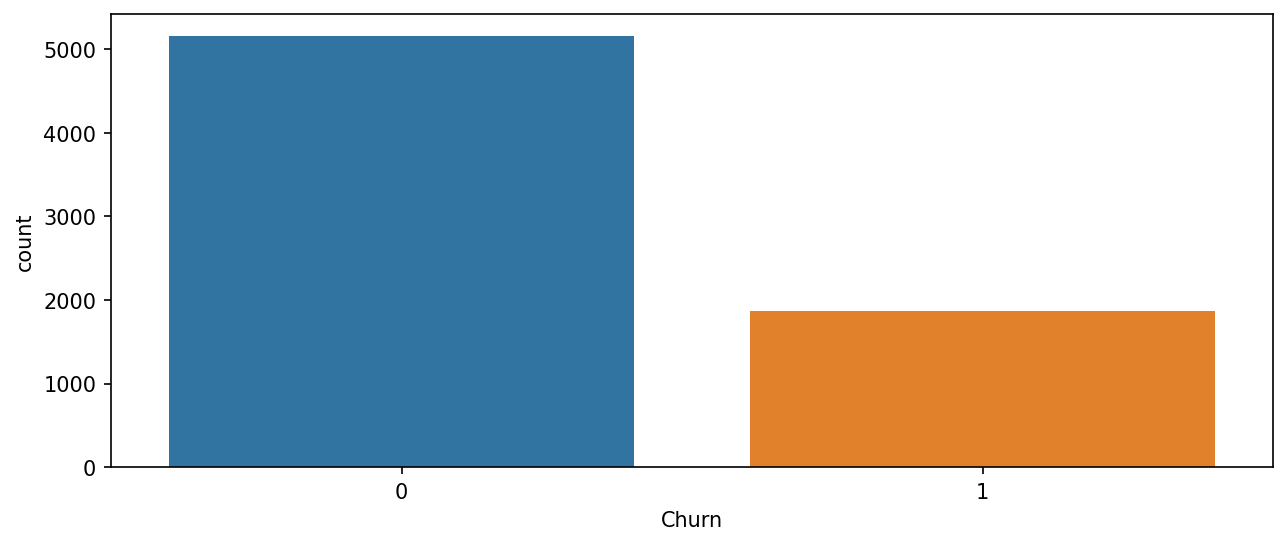

In [117]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=df,x='Churn');

**Exploring the distrbution of TotalCharges between Churn categories with a Box Plot.**

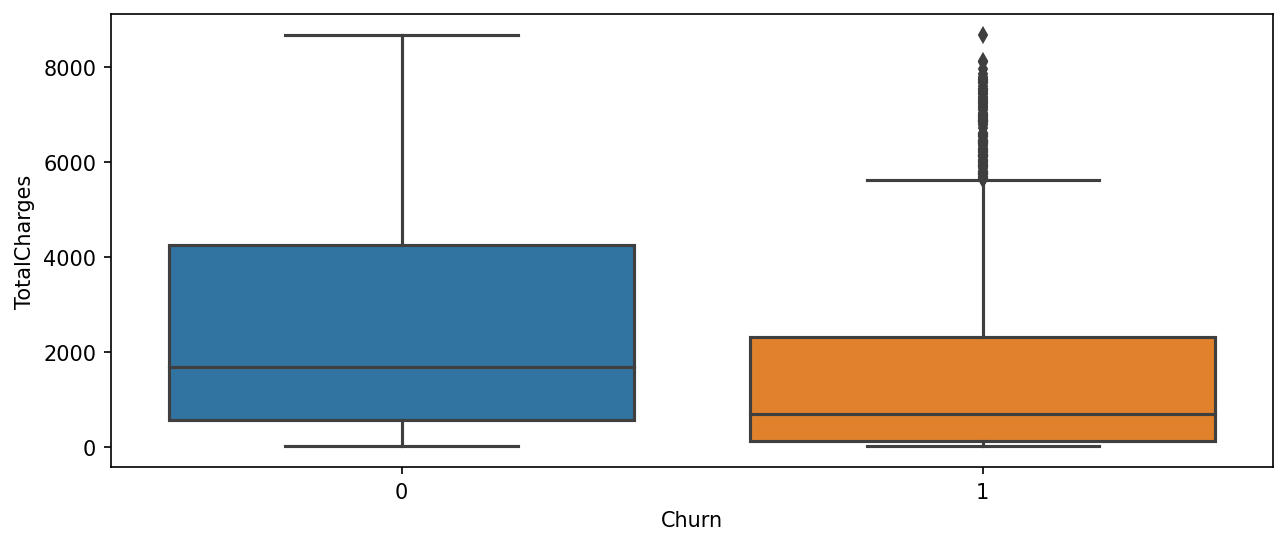

In [90]:
plt.figure(figsize=(10,4),dpi=150)
sns.boxplot(data=df,x='Churn',y='TotalCharges');

**A boxplot showing the distribution of TotalCharges per Contract type.**

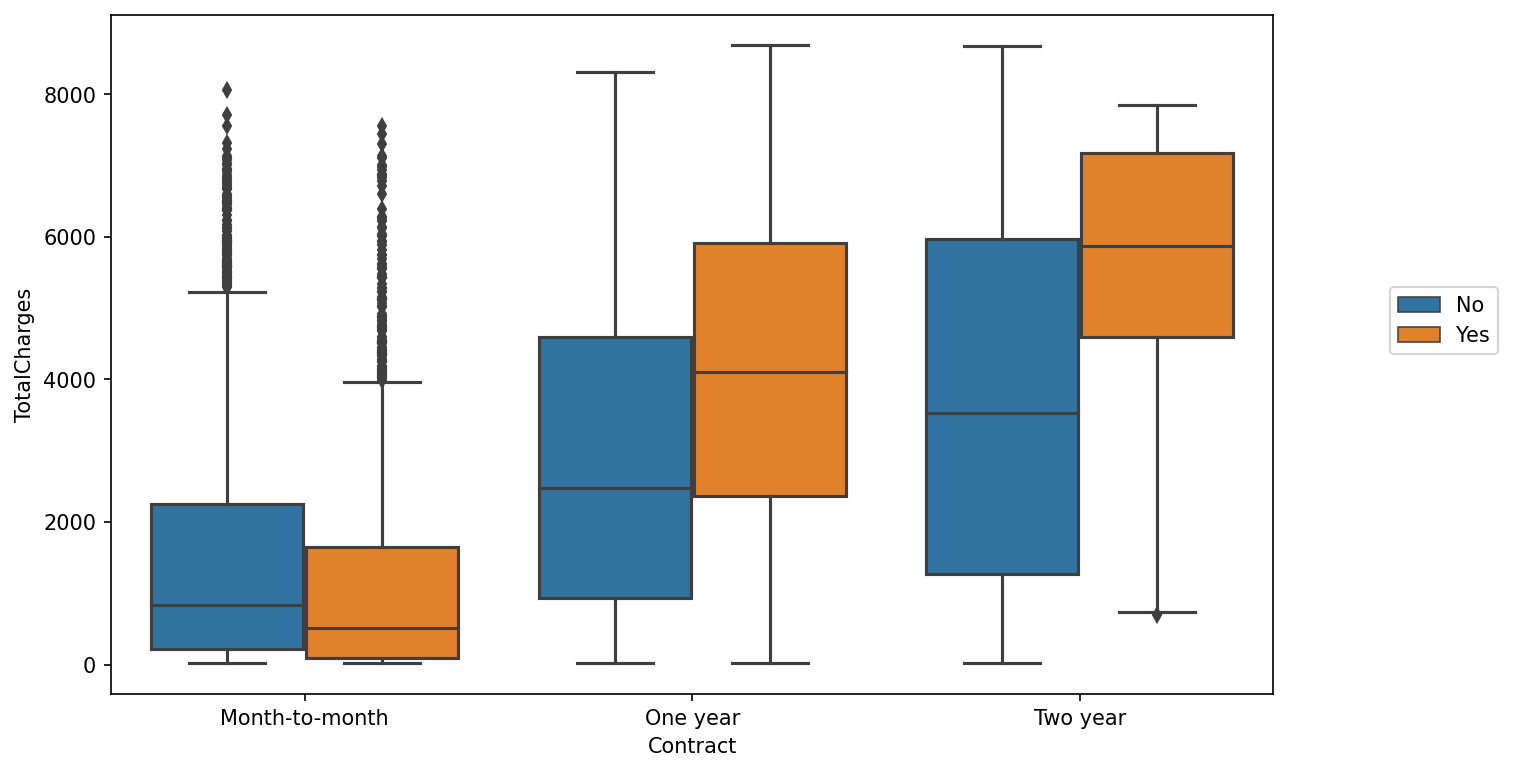

In [11]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5));

**Creating a bar plot that shows the correlation of the features to the class label.**

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [14]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

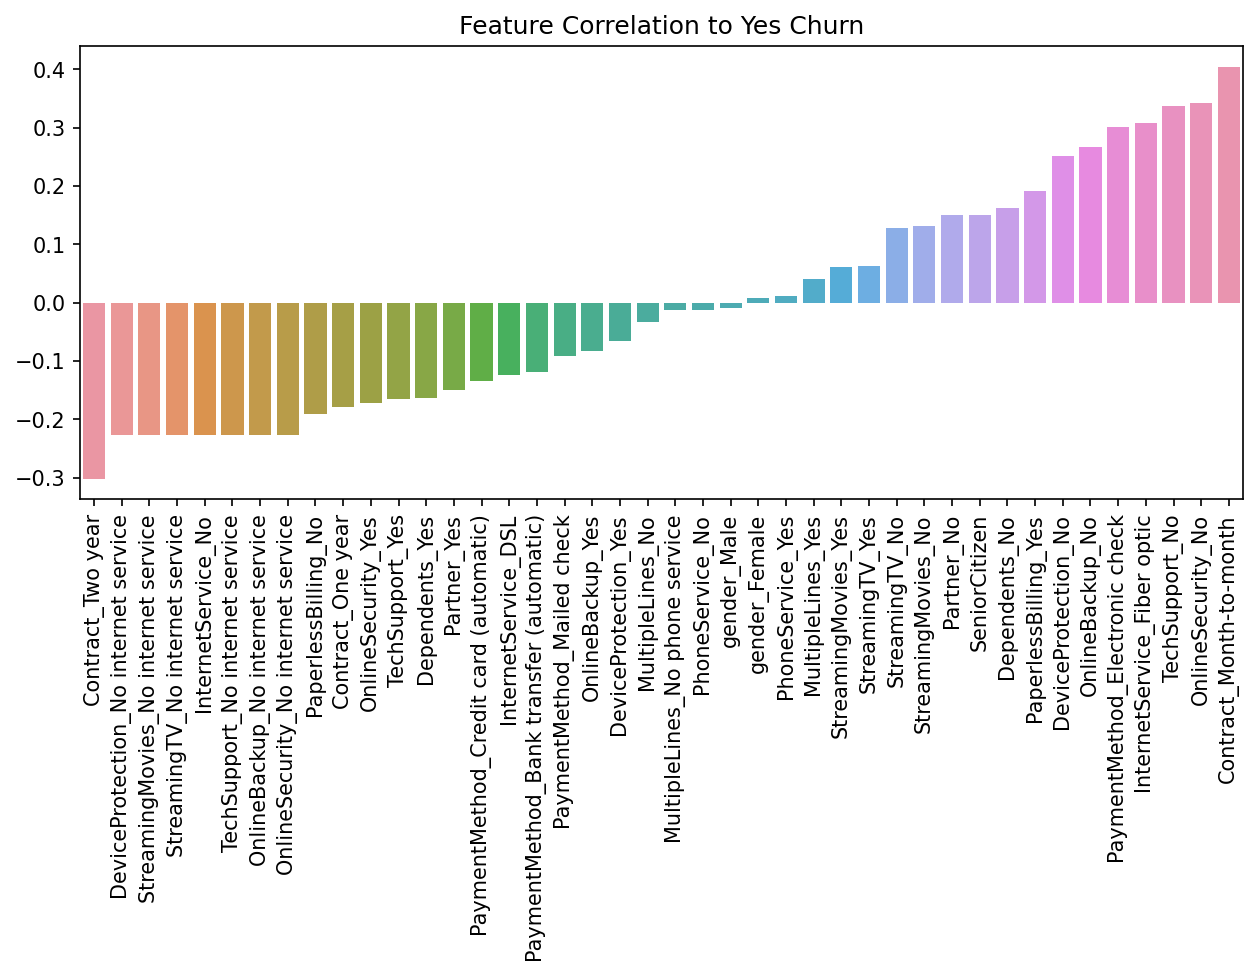

In [89]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90);

---
---

# Part 4: Churn Analysis

**This part focuses on segementing customers based on their tenure, creating "cohorts", allowing to examine differences between customer cohort segments.**

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Creating a histogram that displays the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

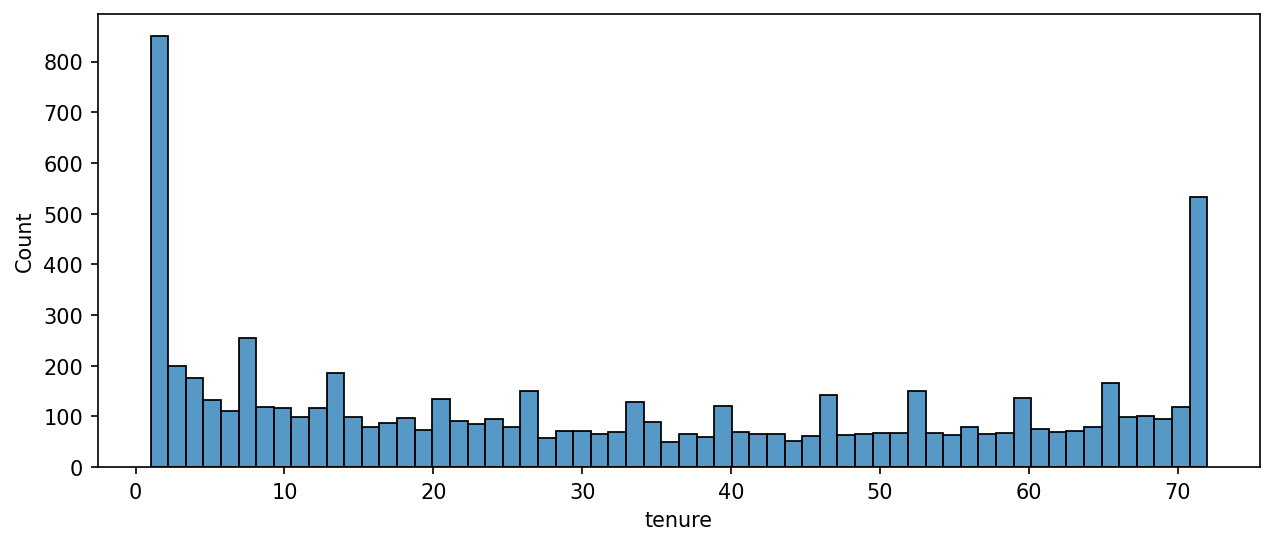

In [88]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=df,x='tenure',bins=60);

**Creating histograms which are separated by two additional features, Churn and Contract.**

<Figure size 1500x900 with 0 Axes>

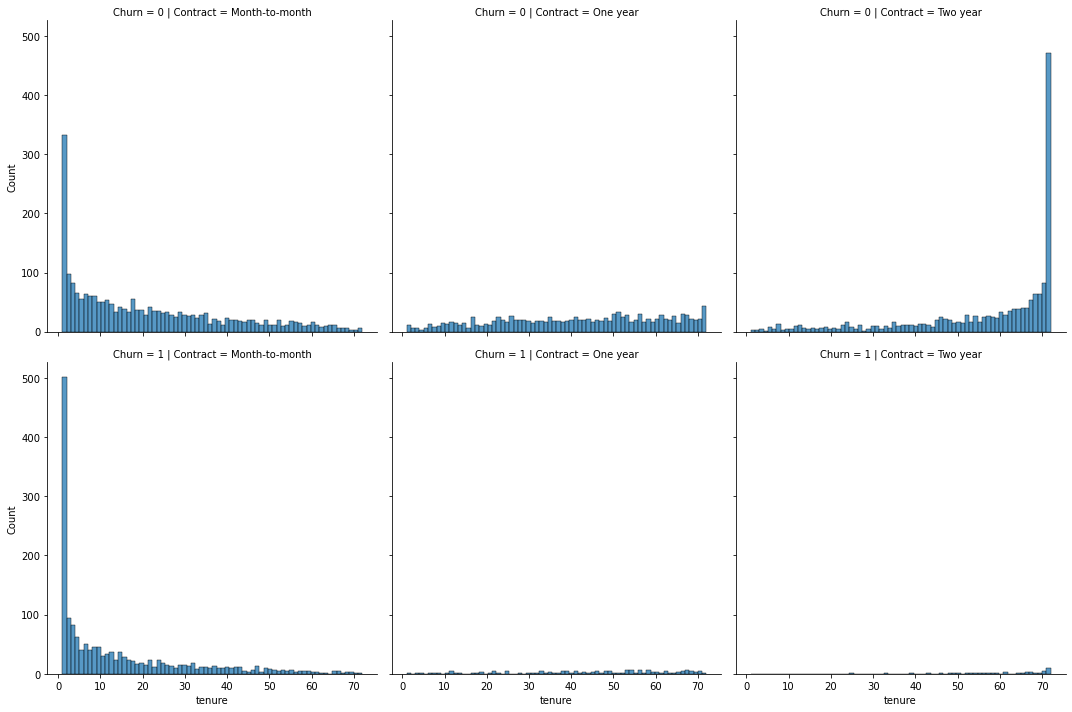

In [83]:
plt.figure(figsize=(10,6),dpi=150)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Displaying a scatter plot of Total Charges versus Monthly Charges.**

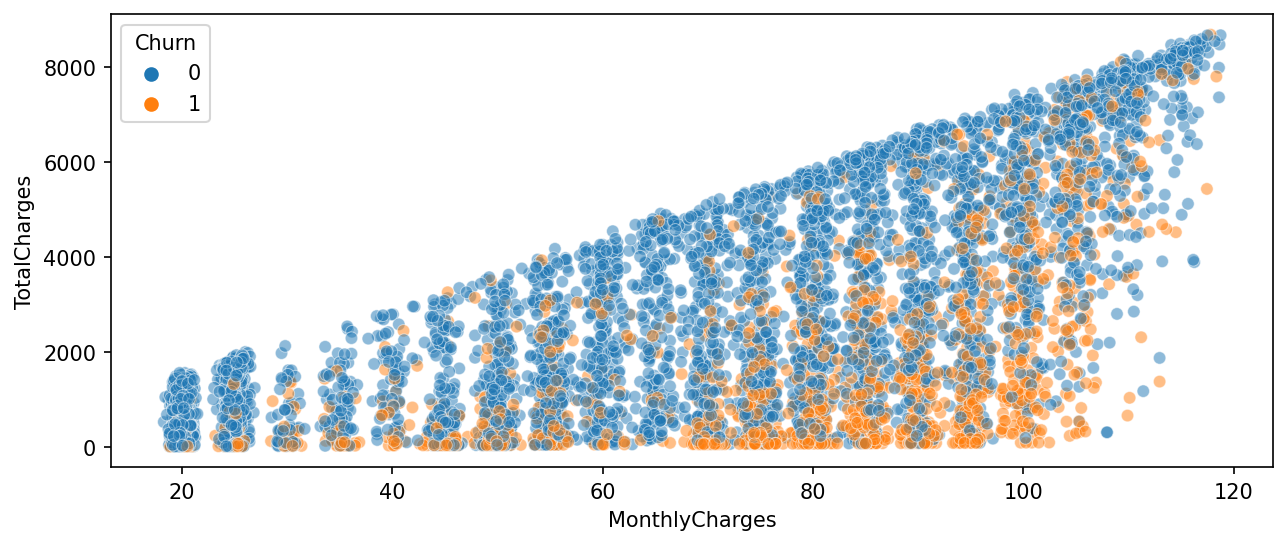

In [87]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5);

### Creating Cohorts based on Tenure

**Now treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort and calculating the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. The data has cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as customers are less likely to stop service the longer they've had it.**

In [20]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [21]:
churn_rate = 100 * (yes_churn/(yes_churn+no_churn))

In [22]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Creating a plot that shows churn rate per months of tenure.**

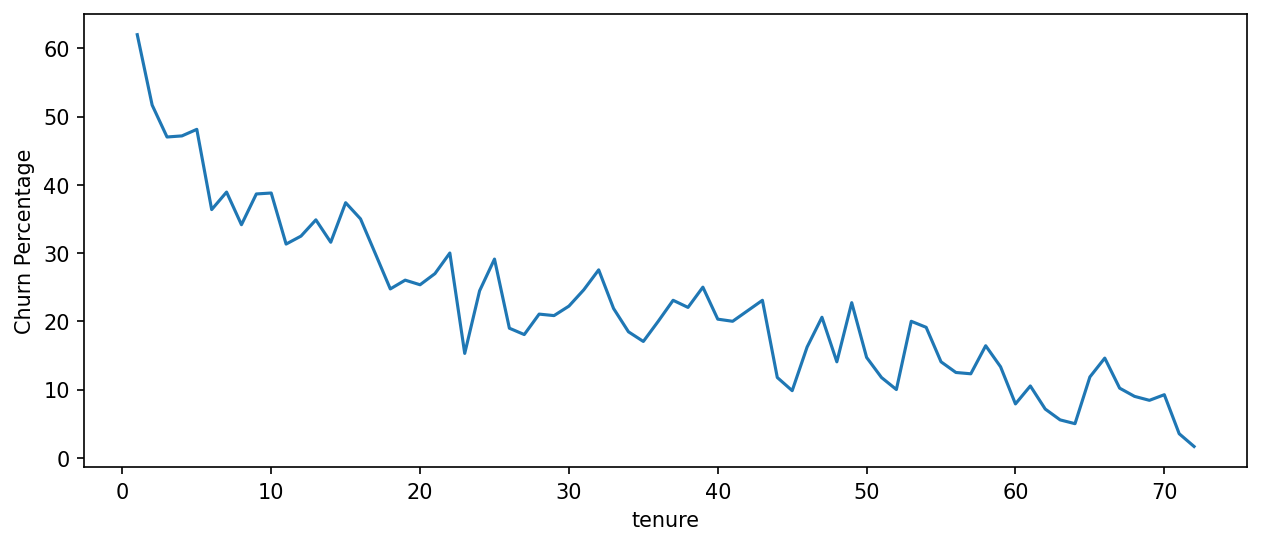

In [85]:
plt.figure(figsize=(10,4),dpi=150)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Broader Cohort Groups
**Based on the tenure column values, creating a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '24-48 Months'
   * '12-24 Months'
   * 'Over 48 Months'    

In [24]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [25]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [26]:
df[['Tenure Cohort','tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


**Creating a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort.**

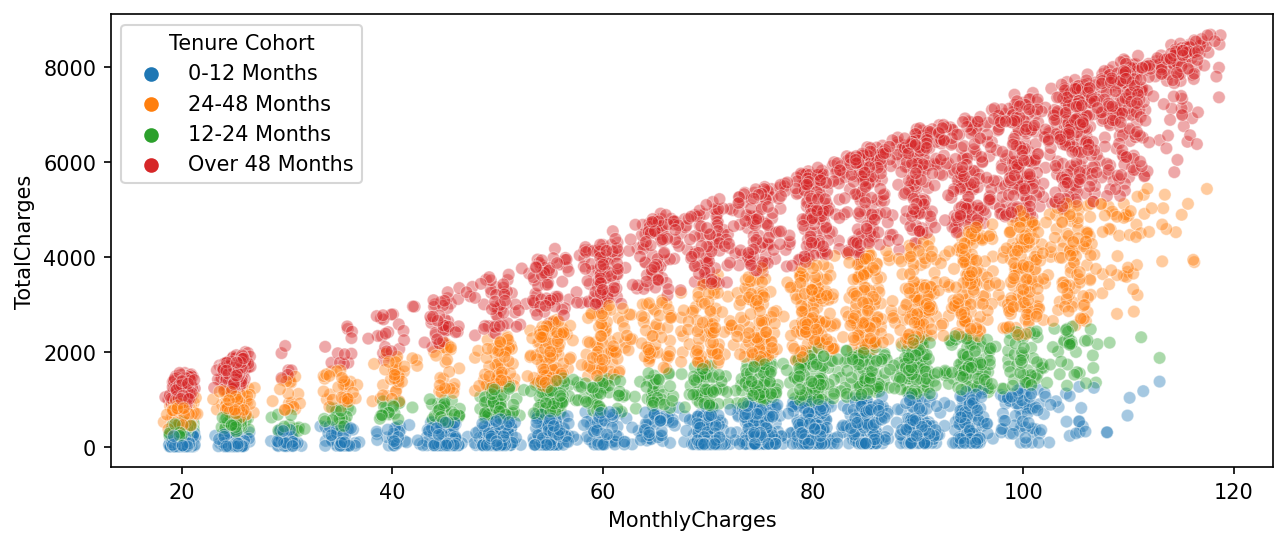

In [86]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.4);

**Creating a count plot that shows the churn count per cohort.**

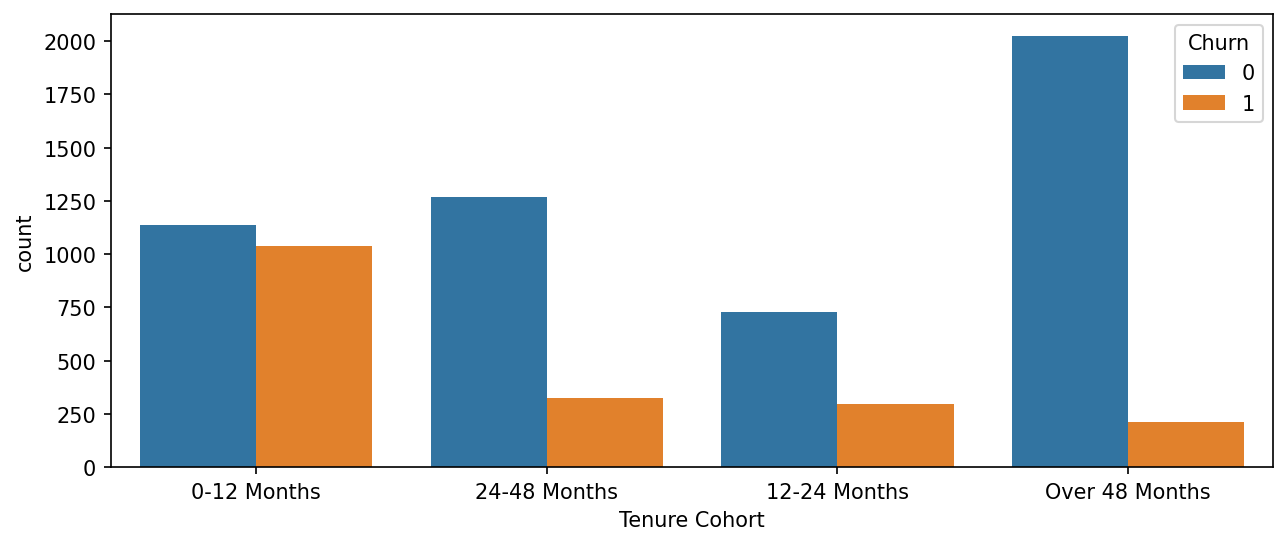

In [92]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn');

**Creating a grid of Count Plots that shows counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 1500x900 with 0 Axes>

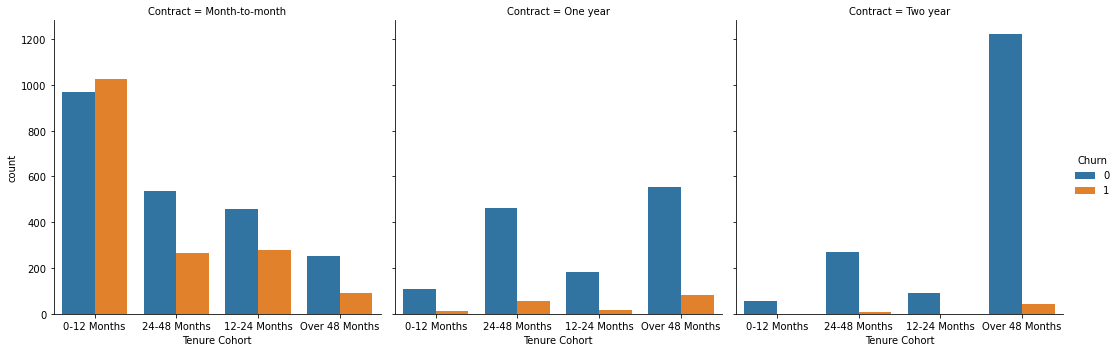

In [93]:
plt.figure(figsize=(10,6),dpi=150)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

-----

# Part 5: Predictive Modeling

**Let's explore 3 different tree based methods: A Single Decision Tree, Random Forest, XGBoost.**


## Single Decision Tree

**Separating out the data into X features and Y label.**

In [30]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [31]:
df['Churn'] = df['Churn'].replace('No',0)
df['Churn'] = df['Churn'].replace('Yes',1)

In [32]:
y = df['Churn']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.1, random_state=101)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier(max_depth=6)

In [37]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [38]:
dt_preds = dt.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [40]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



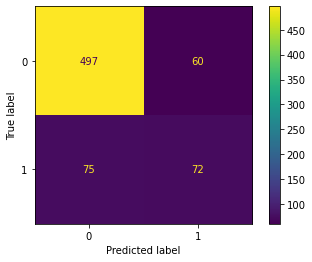

In [41]:
plot_confusion_matrix(dt,X_test,y_test);

In [42]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,
                         index=X.columns,
                         columns=['Feature Importance'])

In [43]:
imp_feats = imp_feats.sort_values('Feature Importance')

In [44]:
imp_feats = imp_feats[imp_feats['Feature Importance'] > 0]

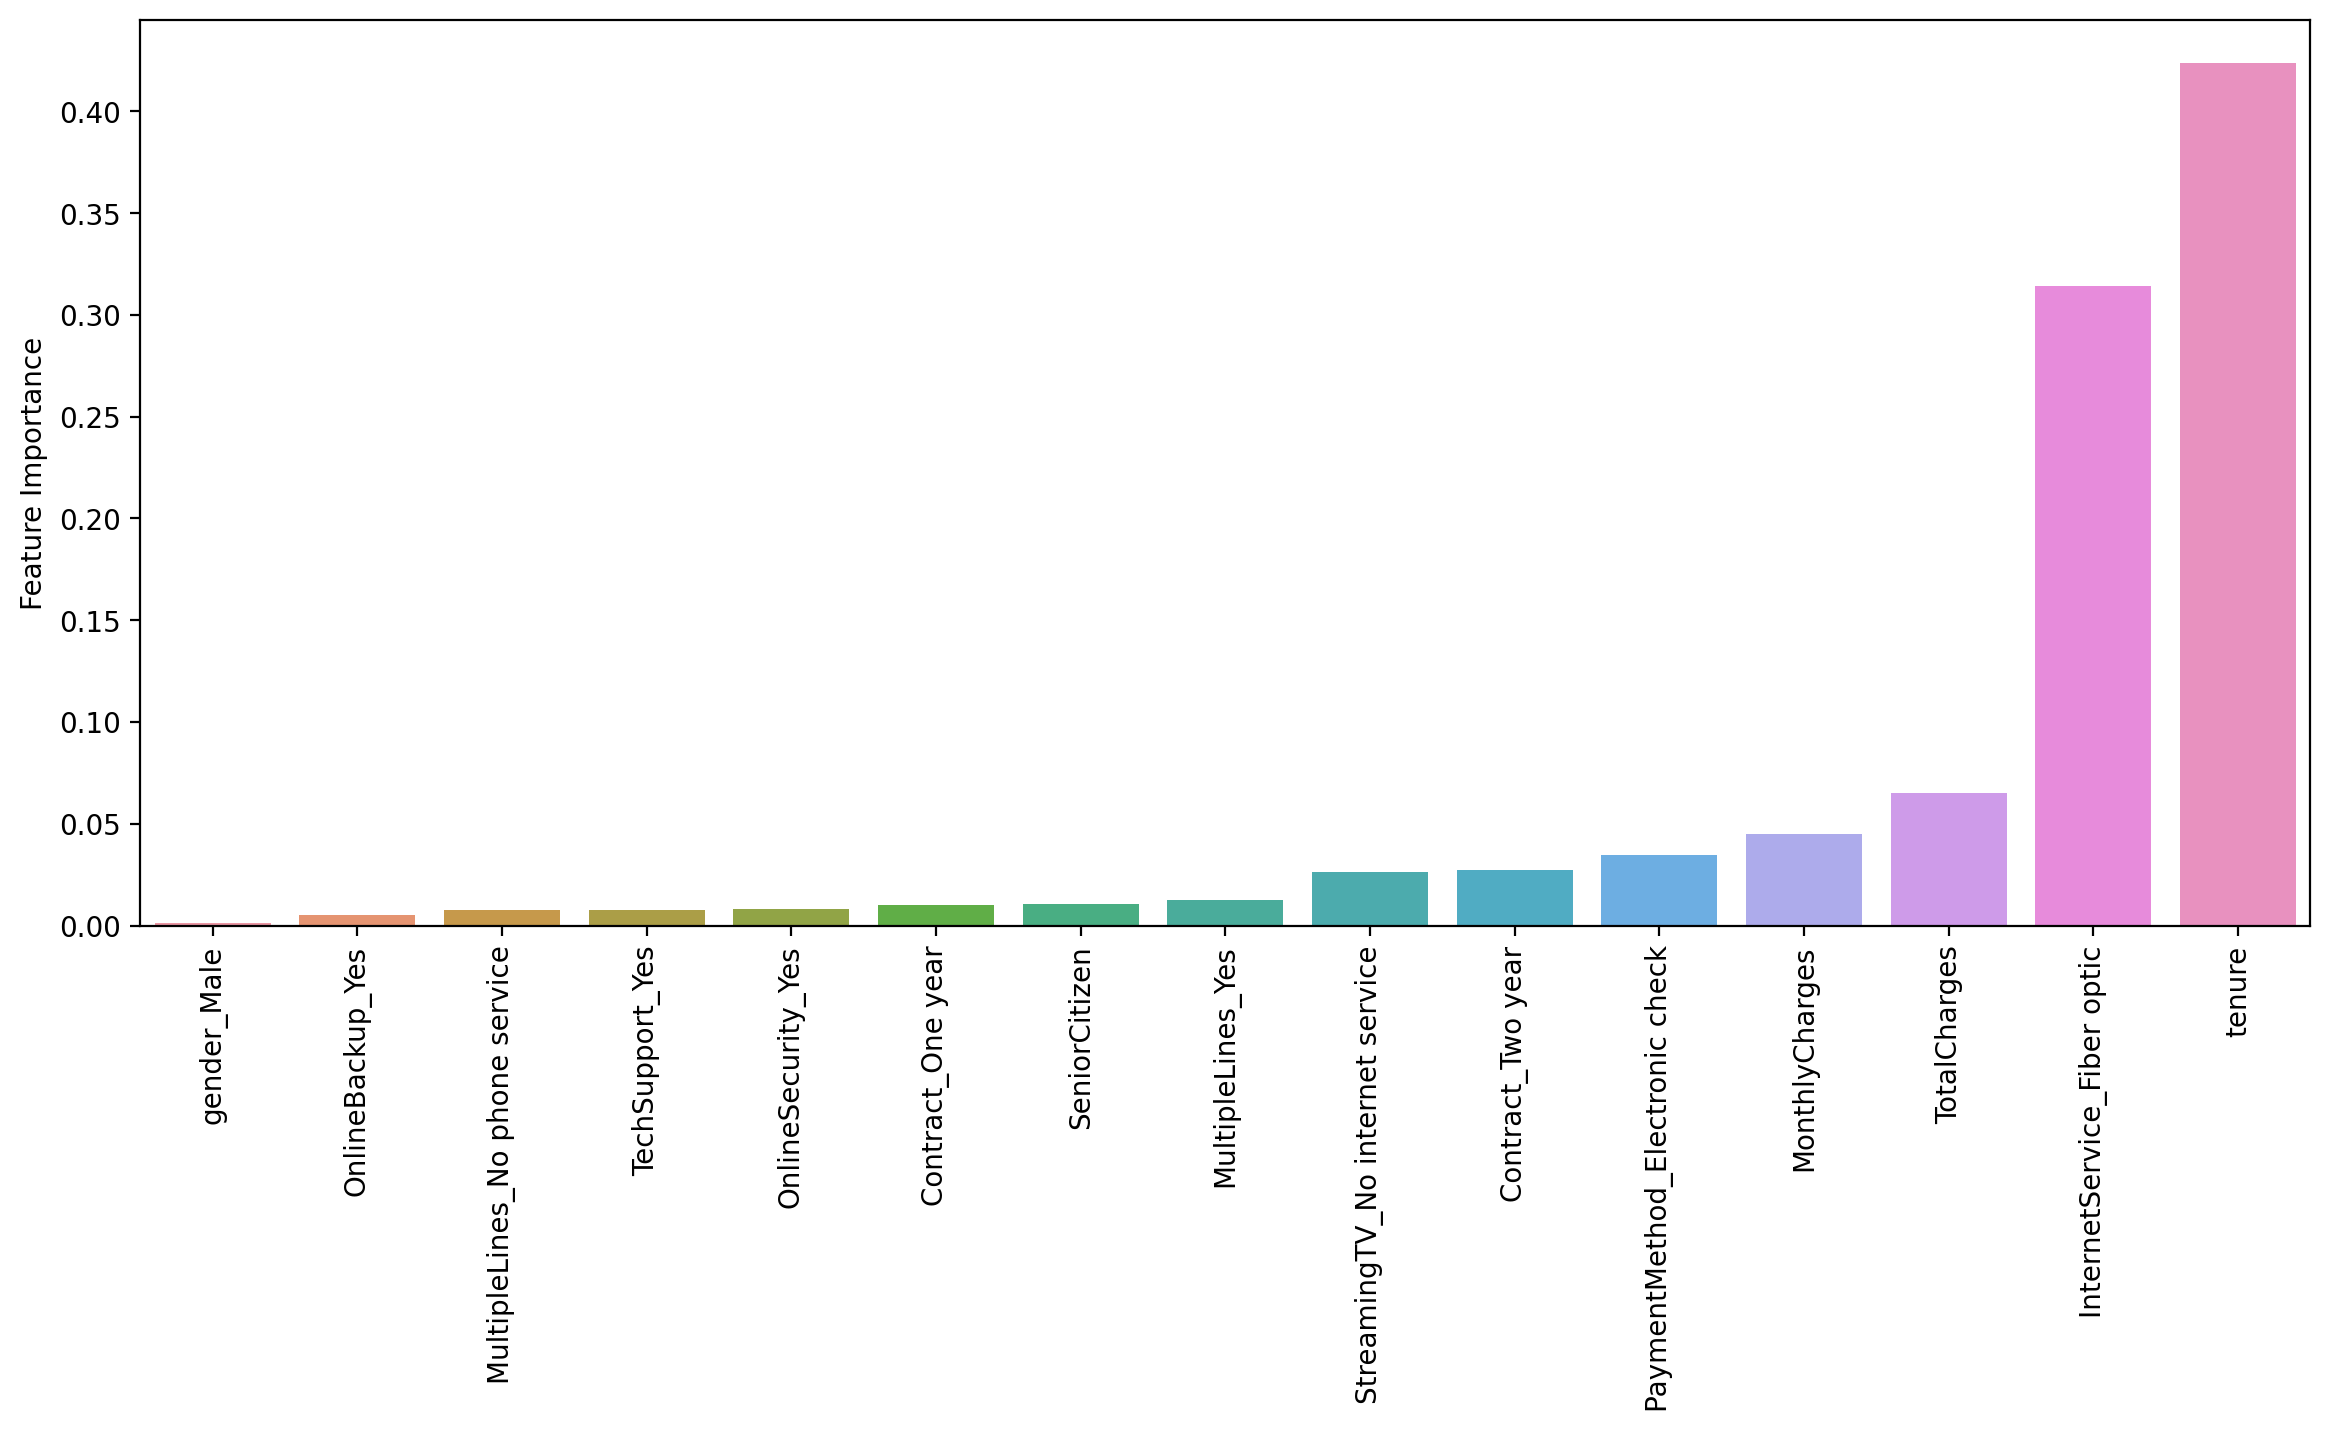

In [45]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Feature Importance')
plt.xticks(rotation=90);

## Random Forest


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(max_depth=6)

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [49]:
rf_preds = rf.predict(X_test)

In [50]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       557
           1       0.61      0.45      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.81       704



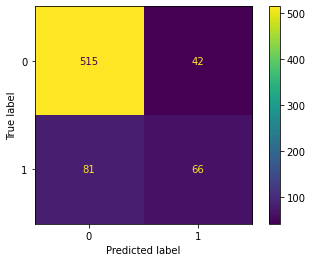

In [94]:
plot_confusion_matrix(rf,X_test,y_test);

## XGBoost


In [52]:
from xgboost import XGBClassifier

In [95]:
xgb_model = XGBClassifier(objective='binary:logistic')

In [96]:
xgb_model.fit(X_train,y_train);

In [97]:
xgb_preds = xgb_model.predict(X_test)

In [98]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       557
           1       0.52      0.48      0.50       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.69       704
weighted avg       0.79      0.80      0.80       704



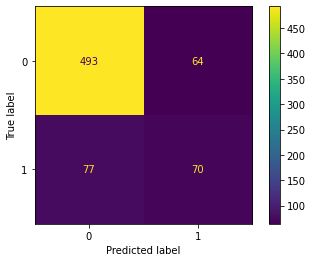

In [100]:
plot_confusion_matrix(xgb_model,X_test,y_test);

## XGBoost with Cross Validation

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {'max_depth':[3,4,5],
              'learning_rate': [0.1,0.01,0.05],
              'gamma':[0,0.25,1],
              'reg_lambda':[0,1,10],
              'scale_pos_weight': [1,3,5]}

In [103]:
grid_model = GridSearchCV(xgb_model,param_grid)

In [104]:
grid_model.fit(X_train,y_train);

In [106]:
grid_model.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

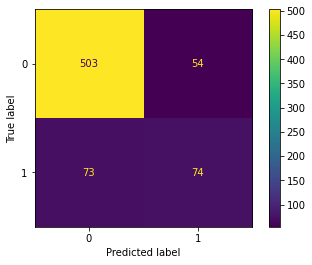

In [107]:
plot_confusion_matrix(grid_model,X_test,y_test);

In [108]:
param_grid = {'max_depth':[3],
              'learning_rate':[0.01,0.05,0.1],
              'reg_lambda':[1],
              'scale_pos_weight': [1,3,5]}

In [109]:
grid_model = GridSearchCV(xgb_model,param_grid)

In [110]:
grid_model.fit(X_train,y_train);

In [111]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1, 'scale_pos_weight': 1}

In [112]:
xgb_model = XGBClassifier(seed=101,
                          objective='binary:logistic',
                          gamma=0,
                          learn_rate=0.1,
                          max_depth=3,
                          reg_lambda=1,
                          scale_pos_weight=1,
                          subsample=0.9,
                          colsample_bytree=0.5)

In [113]:
xgb_model.fit(X_train,y_train);

[09:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [114]:
xgb_preds = xgb_model.predict(X_test)

In [115]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       557
           1       0.59      0.49      0.53       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



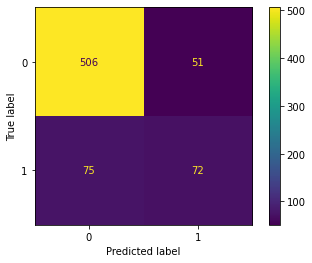

In [116]:
plot_confusion_matrix(xgb_model,X_test,y_test);